# Tarea 3: Regresión y Clasificación

### Integrantes:
- Marcelo Céspedes / 20723668-3
- Carlo Ramírez / 20504139-7
- Joaquín Pinto / 20881033-2 

En esta tarea consideraremos la implementación de una regresión lineal para tareas de regresión y regresión logística para tareas de clasificación. Vamos a trabajar con varios conjuntos de datos, que serán descritos brevemente antes de importarlos. También consideraremos técnicas de regularización, las cuales estudiaremos en más detalle en clases posteriores.

Primero, vamos a importar algunas librerías que necesitaremos antes de continuar.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

El primer conjunto de datos se llama "Seguro de Automóvil en Suecia". Consiste en los siguientes datos:

X = Número de reclamos de seguro.
y = Pago total por todos los reclamos en miles de Coronas Suecas por zonas geográficas en Suecia.

Referencia: Comité Sueco de Análisis de Prima de Riesgo en Seguros de Motor
http://college.hmco.com/mathematics/brase/understandable_statistics/7e/students/datasets/slr/frames/frame.html

Tu primera tarea es leer el conjunto de datos y dividirlo en un conjunto de entrenamiento (70%) y un conjunto de prueba (30%).

In [28]:
# Cargar datos
data = pd.read_csv("03_AutoInsurSweden.txt", sep='\t', header=8, decimal=',')
display(data)
# Separar datos en X (predictores) e y (respuesta).
# Quizás necesites usar np.newaxis.
X = data['X'].values # Completar
y = data['Y'].values # Completar

# Solamente los casteo a float para probar.
X = X.astype(float)

X = X[:, np.newaxis]
y = y[:, np.newaxis]
# Dividir para validación.
# Dividir los datos en conjuntos de entrenamiento y prueba (proporción 30-70)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

,X,Y
0,108,392.5
1,19,46.2
2,13,15.7
3,124,422.2
4,40,119.4
...,...,...
58,9,87.4
59,31,209.8
60,14,95.5
61,53,244.6


## Regresión Lineal
### Regresión Lineal Simple
Vamos a implementar la Regresión Lineal utilizando las ecuaciones clásicas para datos en 2D. Esto debe hacerse utilizando únicamente numpy. Tu tarea es completar la siguiente clase.

In [29]:
class SimpleLinearRegression(object):
    def __init__(self):
        self.coef_ = 0
        self.intercept_ = 0

# Los cambié para que no me diera error.
    def fit(self, X_value, y_value):
        self.intercept_, self.coef_ = self.coefficients(X_value, y_value)

    def predict(self, X_test_value):
        predictions = []
        # Completar esta función
        for x in X_test_value:
            y_predict = self.intercept_ + self.coef_ * x
            predictions.append(y_predict)
        return predictions

    # Calcular coeficientes
    def coefficients(self, X_value, y_value):
        x_mean = self.__mean(X_value)
        y_mean = self.__mean(y_value)
        b1 = self.__covariance(X_value, y_value) / self.__variance(X_value)
        b0 = y_mean - b1 * x_mean
        return [b0, b1]

    # Calcular el valor promedio de una lista de números
    def __mean(self, values):
        return np.mean(values)

    
    # Calcular la covarianza entre X e y
    def __covariance(self, X, y):
        return np.cov(X.squeeze(1), y.squeeze(1), ddof=0)[0][1]

    # Calcular la varianza de una lista de números
    def __variance(self, values):
        return np.var(values)

Ahora probemos el modelo con el conjunto de datos de Seguro de Automóviles en Suecia. Para hacerlo, completarás el siguiente código.

Coeficiente (b1): 3.4138235600663682
Intercepto (b0): 19.99448575911478
Error Cuadrático Medio: 963.9567800465602
Coeficiente R2: 0.9051157637465794


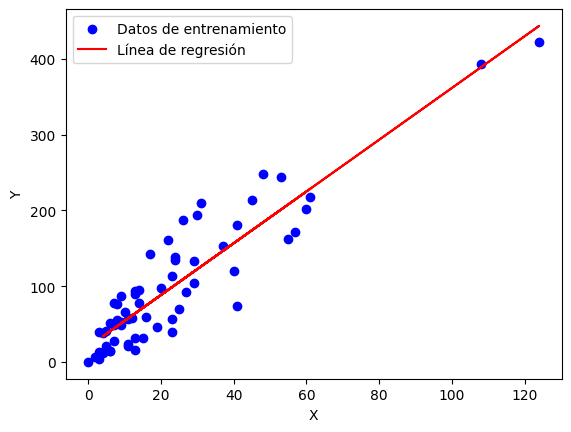

In [30]:
model = SimpleLinearRegression()
# Ajustar el modelo en el conjunto de entrenamiento.
model.fit(X, y)
# Imprimir coeficientes.
print("Coeficiente (b1):", model.coef_)
print("Intercepto (b0):", model.intercept_)
y_pred = model.predict(X_test)# Predecir las respuestas en el conjunto de pruebas.

# Evaluar los resultados en términos del MSE (error cuadrátic medio) y coeficiente R2.
# Imprimir los resultados sobre el conjunto de pruebas.

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Error Cuadrático Medio:", mse)
print("Coeficiente R2:", r2)

# Graficar los datos con un scatter plot y luego incluir la línea predicha por la regresión lineal.

plt.scatter(X, y, label='Datos de entrenamiento', color='blue')

plt.plot(X_test, y_pred, label='Línea de regresión', color='red')

# Decoraciones :)
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()

### Usando sklearn.

En la práctica, rara vez, si es que alguna vez, implementarás un algoritmo desde cero. El escenario más probable es que termines utilizando una librería; para prototipos rápidos, scikit-learn (sklearn) es la elección habitual. Así que ahora implementarás la regresión lineal utilizando esta librería.

In [33]:
# Usa la clase LinearRegression de la librería scikit-learn y realiza el mismo análisis anterior.

modelo = LinearRegression()
modelo.fit(X, y)

# Imprimir coeficientes
print("Coeficiente (b1):", modelo.coef_[0])
print("Intercepto (b0):", modelo.intercept_)


Coeficiente (b1): [3.41382356]
Intercepto (b0): [19.99448576]


### Regresión Lineal Múltiple

Ahora construiremos un modelo de Regresión Lineal Múltiple, aunque primero lo probaremos en nuestros datos en 2D. Primero, necesitamos preparar nuestros datos, deberás agregar una columna llena de unos. También necesitarás dividir los datos en conjuntos de entrenamiento y prueba nuevamente. Técnicamente, podrías simplemente agregar la columna de unos a nuestros conjuntos de datos ya divididos, pero es más fácil hacerlo desde cero (aunque no muy eficiente).

In [ ]:
# Lee los datos y agrega una nueva columna llena de números 1.

X = data['X'].values # Completar aqui.
y = data['Y'].values # Completar aqui.

X = X[:, np.newaxis]
y = y[:, np.newaxis]

# Dividir el conjunto de datos para validación.
X_train, X_test, y_train, y_test = # Completar (proporción 70-30 de nuevo).

Ahora debes implementar la clase `MultipleLinearRegression`, completa el siguiente código.

In [ ]:
class MultipleLinearRegression(object):
    def __init__(self):
        self.theta_ = np.array([0])

    def fit(self, X, y):
        self.theta_ = # Completa esta parte (usa numpy y sus funciones de álgebra lineal)
        
    def predict(self,X_test):
        predictions = []
        # Completa esta funcion.
        return predictions

Ahora vectoriza el conjunto de prueba.

In [ ]:
# Evalua MultipleLinearRegression siguiendo el mismo esquema de antes.

**Ejercicio:**
Compare todos los modelos implementados y explique sus diferencias si es que las hay. Debes escribir tu respuesta en esta celda.

**Respuesta:**

## Regularización

Ahora que entendemos los conceptos básicos de la regresión lineal, nos centraremos en el problema más interesante de sobreajuste, que por ahora resolveremos utilizando regularización.

Veremos dos modelos de regularización: Regresión Ridge (L2) y LASSO (L1), pero en esta tarea solo implementaremos uno.0 Ten en cuenta que estas ideas se pueden aplicar a otros algoritmos, pero por simplicidad las estudiaremos utilizando la regresión lineal clásica.

Fuente: https://www.analyticsvidhya.com/blog/2016/01/complete-tutorial-ridge-lasso-regression-python/

La regresión Ridge y LASSO son técnicas poderosas que se utilizan generalmente para crear modelos parsimoniosos en presencia de un "gran" número de características. Aquí, "gran" puede significar típicamente una de dos cosas:

- Suficientemente grande como para aumentar la tendencia de un modelo a sobreajustar (incluso tan pocas como 10 variables pueden causar sobreajuste).
- Suficientemente grande como para causar desafíos computacionales. Con los sistemas modernos, esta situación podría surgir en caso de millones o miles de millones de características.

### Nuevos datos

Ahora leeremos nuevos datos multidimensionales desde el archivo 02_Winequality.csv. Nuestro objetivo será predecir la calidad de cada vino.

In [39]:
wine = pd.read_csv('03_Winequality.csv', delimiter=',') # Lee el archivo 03_Winequality.csv con pandas.

# Reemplazar espacios en los nombres de las columnas y convertir todas las columnas a minúsculas.
wine.columns = wine.columns.str.lower()# Completar esta parte.
wine.columns = wine.columns.str.replace(' ', '_')

print(wine.columns)

Index(['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar',
       'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density',
       'ph', 'sulphates', 'alcohol', 'quality', 'red_wine'],
      dtype='object')


### Regresión Ridge

También conocida simplemente como Regresión Lineal Regularizada o Mínimos Cuadrados Regularizados, dependiendo de la fuente. Esta técnica es fácil de implementar, de hecho, ¡la vimos en nuestra clase sobre regresión! No utilizaremos scikit-learn para esta parte, ya que simplemente sigue la misma plantilla que antes, solo que requiere proporcionar el parámetro adicional de regularización.

Todo lo que necesitamos hacer es implementar la siguiente ecuación:

$$\theta = {(X^T X + \lambda I)}^{-1} X^T y$$

Entonces, tu tarea es implementar la siguiente clase utilizando numpy.

In [40]:
class RidgeRegression(object):
    def __init__(self, r_lambda):
        self.theta_ = np.array([0])
        self.lambda_ = r_lambda

    def fit(self, X, y):
        # Calcular la matriz de diseño transpuesta
        X_transpose = X.T
        
        # Calcular X^T * X
        XTX = np.dot(X_transpose, X)
        
        # Calcular lambda * I (matriz identidad del tamaño de XTX)
        lambda_I = self.lambda_ * np.identity(XTX.shape[0])
        
        # Calcular la inversa de (X^T * X + lambda * I)
        inverse = np.linalg.inv(XTX + lambda_I)
        
        # Calcular X^T * y
        XTy = np.dot(X_transpose, y)
        
        # Calcular theta
        self.theta_ = np.dot(inverse, XTy) # Completar esta parte.
        
    def predict(self,X_test):
        # Completar esta parte.
        predictions = np.dot(X_test, self.theta_)
        return predictions

Cuando uses la Regresión Ridge (o otros modelos como LASSO), siempre estandariza las columnas predictoras antes de construir los modelos, ¡incluso las variables categóricas codificadas como dummy! Definiremos nuestra variable objetivo y normalizaremos las columnas que no son la variable objetivo a continuación.

Recordemos la ecuación para la penalización Ridge:

$$ \text{Ridge Penalty}\; = \lambda\sum_{j=0}^{n-1} \theta_j^2$$

¿Cómo se ven afectados los coeficientes $\theta$ por la media y la varianza de tus variables? Si la media y la varianza de tus predictores $x$ son diferentes, sus respectivos coeficientes $\beta$ se escalan con la media y la varianza de los predictores, independientemente de su poder explicativo. Esto significa que una de tus variables $x$ (por ejemplo, la acidez fija) tendrá un valor $\beta$ mucho más pequeño que otra variable (digamos, el ácido cítrico), porque la escala de las dos variables es muy diferente. Debido a que las penalizaciones Ridge no tienen en cuenta la media y la varianza de tus predictores, el ajuste depende de ti. Estas penalizaciones solo se ven afectadas por el valor de los coeficientes.

Ahora prueba tu regresión con los datos del conjunto de datos de calidad del vino. No olvides normalizar restando la media y dividiendo por la desviación estándar. No debes normalizar la variable objetivo/dependiente.

In [41]:
# Elige una variable objetivo/dependiente para predecir.
target = 'quality'

# Selecciona todas las columnas que no son la variable objetivo.
nc = [col for col in wine.columns if col != target] # Completar aquí.

# Normaliza las variables que no son el objetivo.
# Al restar la media y dividir por la desviación estándar, el procedimiento de normalización coloca
# todas las variables predictoras en la misma escala (distribuciones con media == 0 y desviación estándar == 1).
wine.loc[:, nc] = (wine[nc] - wine[nc].mean()) / wine[nc].std() # Completar

# Añada la columna intercepto.
wine['intercept'] = 1 # Completar

# Muestra el conjunto de datos normalizado.
display(wine)

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,ph,sulphates,alcohol,quality,red_wine,intercept
0,0.142462,2.188664,-2.192664,-0.744721,0.569914,-1.100055,-1.446247,1.034913,1.812950,0.193082,-0.915394,5,1.750055,1
1,0.451001,3.281982,-2.192664,-0.597594,1.197883,-0.311296,-0.862402,0.701432,-0.115064,0.999502,-0.580023,5,1.750055,1
2,0.451001,2.553104,-1.917405,-0.660648,1.026618,-0.874695,-1.092402,0.768128,0.258100,0.797897,-0.580023,5,1.750055,1
3,3.073580,-0.362411,1.660957,-0.744721,0.541370,-0.762016,-0.986248,1.101609,-0.363840,0.327485,-0.580023,6,1.750055,1
4,0.142462,2.188664,-2.192664,-0.744721,0.569914,-1.100055,-1.446247,1.034913,1.812950,0.193082,-0.915394,5,1.750055,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,-0.783154,-0.787590,-0.197039,-0.807775,-0.486215,-0.367636,-0.420095,-1.186069,0.320294,-0.210128,0.593772,6,-0.571323,1
6493,-0.474615,-0.119451,0.284664,0.537383,-0.257863,1.491582,0.924517,0.067819,-0.426034,-0.478935,-0.747709,5,-0.571323,1
6494,-0.551750,-0.605370,-0.885185,-0.891847,-0.429127,-0.029596,-0.083942,-0.719196,-1.421138,-0.478935,-0.915394,6,-0.571323,1
6495,-1.323097,-0.301671,-0.128224,-0.912866,-0.971463,-0.592996,-0.101635,-2.003097,0.755652,-1.016548,1.935253,7,-0.571323,1


In [42]:
X = wine[nc].values # Construye la matriz de características. Considera usar el atributo .values de las dataframes de pandas.
y = wine[target].values # Construye el vector de salidas. Considera usar el atributo .values de las dataframes de pandas.

# Dividir el conjunto de datos para validación.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) # Proporcion 70-30.

In [43]:
# Prueba tu modelo con r_lambda = 1.0
model = RidgeRegression(1.0) # Completar aquí.

# Entrena tu modelo con los datos de entrenamiento.
model.fit(X_train, y_train)

# Imprime los coeficientes
print("Coeficientes del modelo:")
print(model.theta_)

# Predice los resultados sobre el conjunto de prueba.
y_pred = model.predict(X_test)

# Calcula las métricas de evaluación MSE y R2 e imprime.
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"\nMean Squared Error (MSE): {mse:.2f}")
print(f"R-squared (R2): {r2:.2f}")

Coeficientes del modelo:
[-0.03120419 -0.29091038 -0.07426497  0.13250572  0.00556388  0.14750674
  0.00215676 -0.10092186 -0.04911731  0.12282788  0.39699734  0.25289125]

Mean Squared Error (MSE): 34.38
R-squared (R2): -44.85


Compara tus resultados anteriores con la implementación de scikit-learn. Deberías obtener los mismos resultados, ten en cuenta que $\lambda$ se llama $\alpha$ en scikit-learn, esto se hace en varios modelos para evitar el problema con la palabra clave ``lambda`` en Python.

In [44]:
# Haz el mismo análisis con el modelo de ridge regression de scikit-learn.
from sklearn.linear_model import Ridge
# Entrena el modelo de Ridge de scikit-learn
clf = Ridge(alpha=1.0, fit_intercept=False)
clf.fit(X_train, y_train)
y_pred_sklearn = clf.predict(X_test)

# Calcula las métricas de evaluación para el modelo de scikit-learn 0.53, -1.25
mse_sklearn = mean_squared_error(y_test, y_pred_sklearn)
r2_sklearn = r2_score(y_test, y_pred_sklearn)

print("\nResultados del modelo de scikit-learn:")
print(f"Mean Squared Error (MSE): {mse_sklearn:.2f}")
print(f"R-squared (R2): {r2_sklearn:.2f}")


Resultados del modelo de scikit-learn:
Mean Squared Error (MSE): 34.38
R-squared (R2): -44.85


Tu modelo debería haber arrojado un valor negativo de $R^2$. Por favor, proporciona una explicación adecuada sobre el significado de este valor.

#### Respuesta:
Tu respuesta va a aquí.

## Clasificación con Regresión Logística

Finalmente, nos dirigimos a las técnicas de clasificación. Ten en cuenta que la Regresión Logística en realidad proporciona una estimación de una probabilidad entre 0 y 1. Por lo tanto, es en realidad un método de regresión para ese intervalo; sin embargo, se convierte en un esquema de clasificación al interpretar esta probabilidad como la posibilidad de que un cierto punto de datos pertenezca a una clase positiva. En otras palabras, todos los valores iguales o superiores a 0.5 se asignan a 1 y todos los demás se asignan a 0 (es decir, redondeo).

Utilizaremos el conjunto de datos de calidad del vino, pero en lugar de predecir la calidad, intentaremos predecir si es vino tinto o no. Inicialmente, utilizaremos la implementación de scikit-learn para mostrar lo sencillo que es. Importemos los módulos relevantes.

In [34]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

Ahora lee los datos nuevamente (o revierte la normalización y cambia la variable de salida a `red_wine` en lugar de `quality`, pero eso podría llevar más tiempo). Luego, divide nuevamente en conjuntos de entrenamiento y prueba (70/30 de división).

In [35]:
from sklearn.preprocessing import StandardScaler  # Importa StandardScaler

# Leer el conjunto de datos
wine = pd.read_csv("03_Winequality.csv")

# Seleccionar la variable objetivo (dependiente)
target = 'red_wine'

# Seleccionar todas las columnas que no son la variable objetivo
non_target_cols = [col for col in wine.columns if col != target]

# Normalizar las variables que no son el objetivo utilizando StandardScaler
scaler = StandardScaler()
wine[non_target_cols] = scaler.fit_transform(wine[non_target_cols])

# Agregar una columna de intercepto (unos) al conjunto de datos
wine['intercept'] = 1

# Construir la matriz de características (X) y el vector de salidas (y)
X = wine[non_target_cols + ['intercept']].values
y = wine[target].values

# Dividir el conjunto de datos en conjuntos de entrenamiento y prueba (proporción 70-30)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

Ahora probemos la implementación de Regresión Logística de scikit-learn. Ten en cuenta que esta implementación incluye varios parámetros predeterminados que están ocultos (¡tiene un término de regularización por defecto!).

In [36]:
# Inicializar y entrenar el modelo de Regresión Logística
model = LogisticRegression()
model.fit(X_train, y_train)

# Realizar predicciones en el conjunto de prueba
y_pred = model.predict(X_test)

# Calcular la precisión del modelo
accuracy = accuracy_score(y_test, y_pred)
print("Precisión del modelo de Regresión Logística (scikit-learn):", accuracy)


Precisión del modelo de Regresión Logística (scikit-learn): 0.9892307692307692


Ahora implementemos la Regresión Logística nosotros mismos utilizando el Descenso de Gradiente. Para hacer esto, necesitamos definir nuestra función de costo:

$$ J(\theta) = \frac{1}{n} \sum_{i=1}^{N}{y^{(i)}\log(h_\theta(x^{(i)}) + (1 - y^{(i)})\log(1 - h_\theta(x^{(i)})}$$

#### ===== Opcional =====
Demuestra que la derivada de la función de costo está dada por:

$$ \nabla J(\theta) = x(\hat{y} - y)$$

Donde $y$ es la etiqueta de clase real (0 o 1), $\hat{y}$ es la predicción del modelo (nota que esto usa una función sigmoide, que es posible que necesites) y $x$ es tu característica o vector de características). Para este ejercicio, podría ser útil investigar primero la derivada de la función sigmoide.
#### ===== Fin de la Parte Opcional ===== 

Para aplicar el Descenso de Gradiente, primero necesitaremos implementar la función sigmoide, que está definida como:

$$ \sigma(x) = \frac{1}{1+\exp(-x)}$$

In [ ]:
def sigmoid(x):
  return 1 / (1 + np.exp(-x))

#### Implementación con Descenso de Gradiente
Ahora implementaremos la Regresión Logística utilizando el Descenso de Gradiente, completa la siguiente clase. Tienes las funciones básicas `fit` y `predict`, pero también tienes una función auxiliar que podrías necesitar para el descenso de gradiente. Ten en cuenta que $\alpha$ es nuestra tasa de aprendizaje en este contexto (consulta las clases para obtener detalles sobre el algoritmo de Descenso de Gradiente).

Para fines de nuestro ejercicio, detendremos el descenso de gradiente después de haber alcanzado un cierto número de iteraciones; no usaremos una estimación del error para detenernos. Aunque sería lo correcto, volveremos al Descenso de Gradiente más adelante, por lo que por ahora un simple bucle `for` es suficiente (nota que de otra manera tendríamos que implementar un bucle `while` y definir una tolerancia para el error, además del número máximo de iteraciones permitidas).

In [37]:
class LogisticRegressionGD(object):
    def __init__(self):
        self.theta_ = np.array([0])

    def sigmoid(self, x):
        return 1 / (1 + np.exp(-x))

    def update_weights(self, features, labels, alpha):
        n = features.shape[1]  # Cantidad de columnas
        self.theta_ = np.zeros(n)  # Inicializa theta con ceros

        for _ in range(5000):  # Número máximo de iteraciones
            # 1 - Obtén las predicciones
            predictions = self.sigmoid(np.dot(features, self.theta_))

            # 2 - Calcula el gradiente
            error = labels - predictions
            gradient = np.dot(features.T, error)

            # 3 - Calcula el promedio de la derivada del costo para cada característica (dividir por n)
            gradient /= n

            # 4 - Multiplica el gradiente por la tasa de aprendizaje
            gradient *= alpha

            # 5 - Substrae el valor obtenido de los pesos para minimizar el costo
            self.theta_ += gradient

    def fit(self, X, y, max_iters=5000, lr=0.01):
        self.update_weights(X, y, lr)

    def predict(self, X_test):
        # Obtén las predicciones. Este es un problema de clasificación binaria.
        # Debes predecir 1 o 0 utilizando un umbral de 0.5.
        probabilities = self.sigmoid(np.dot(X_test, self.theta_))
        predictions = (probabilities >= 0.5).astype(int)
        return predictions

Ahora prueba el modelo con los mismos datos que antes y compara los resultados, deberían ser similares. Puede ser necesario cambiar el número de épocas (iteraciones) para obtener resultados óptimos. Es posible que veas resultados diferentes, ya que, como mencionamos antes, la función `LogisticRegression` de scikit-learn tiene muchos parámetros adicionales inicializados en valores predeterminados. Sin embargo, los resultados aún deberían ser decentes.

In [38]:
# Instancia y entrena el modelo de Regresión Logística con Descenso de Gradiente
logistic_regression_gd = LogisticRegressionGD()
logistic_regression_gd.fit(X_train, y_train, max_iters=10000, lr=0.01)

# Realiza predicciones en el conjunto de prueba
y_pred_gd = logistic_regression_gd.predict(X_test)

# Calcula la precisión del modelo implementado con Descenso de Gradiente
accuracy_gd = accuracy_score(y_test, y_pred_gd)
print("Precisión del modelo de Regresión Logística con Descenso de Gradiente:", accuracy_gd)

Precisión del modelo de Regresión Logística con Descenso de Gradiente: 0.9902564102564102


## ¡Felicitaciones, has completado tu tercer tarea!